Assignment 02\
190639B

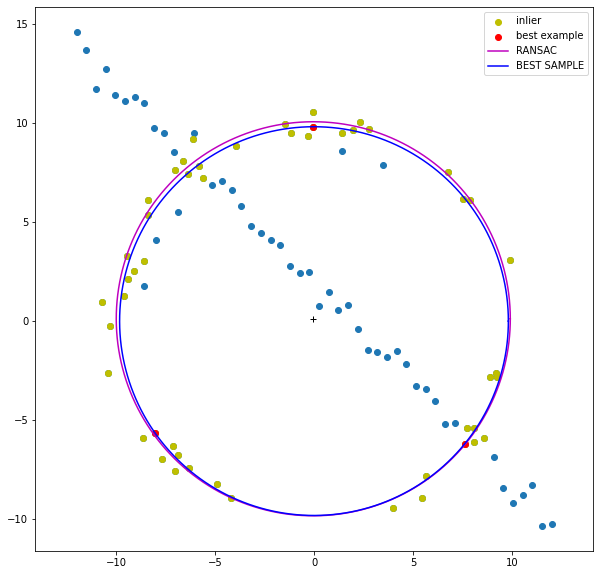

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from scipy import linalg
N=100
half_n=N//2
r=10
s=r/16
t=np.random.uniform(0,2*np.pi,half_n)
n=s*np.random.randn(half_n)
x,y=(r+n)*np.cos(t),(r+n)*np.sin(t)
X_circ=np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
m,b=-1,2
x=np.linspace(-12,12,half_n )
y=m*x+b+s*np.random.randn(half_n )
X_line=np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
X= np.vstack((X_circ,X_line))
def random_points(X):
    sample=[]
    for r in range(0,3):
        random_index=np.random.randint(len(X))
        sample.append(X[random_index])
    return sample
def model_circle(X):
    sample=random_points(X)
    p1,p2,p3=sample[0],sample[1],sample[2]
    A=np.array([[2*p1[0]-2*p2[0],2*p1[1]-2*p2[1]],[2*p2[0]-2*p3[0],2*p2[1]-2*p3[1]]])
    B=np.array([[p1[0]**2-p2[0]**2+p1[1]**2-p2[1]**2],[p2[0]**2-p3[0]**2+p2[1]**2-p3[1]**2]])
    center=np.matmul(linalg.pinv(A),B)
    radius=np.sqrt((p1[0]-center[0][0])**2+(p1[1]-center[1][0])**2)
    return center,radius,sample
def check_neighbour(x,y,a,b,r):
    return (x-a)**2+(y-b)**2-r**2
def RANSAC_model(X):
    while True:
        new_X=[]
        threshold_value=1
        center,radius,sample=model_circle(X)
        a,b=center[0][0],center[1][0]
        for i in X:
            if check_neighbour(i[0],i[1],a,b,radius+threshold_value)<=0:
                if check_neighbour(i[0],i[1],a,b,radius-threshold_value)>=0:
                    new_X.append(i)
        if (len(new_X)/len(X))>=0.5 and -10<a<10 and -15<b<15:
            return a,b,radius,np.array(new_X)
a,b,r,new_X=RANSAC_model(X)
def BEST_model(Y):
    while True:
        new_X=[]
        threshold_value=1
        center,radius,sample=model_circle(Y)
        a,b=center[0][0],center[1][0]
        for i in Y:
            if check_neighbour(i[0],i[1],a,b,radius+threshold_value)<=0:
                if check_neighbour(i[0],i[1],a,b,radius-threshold_value)>=0:
                    new_X.append(i)
        if (len(new_X)/len(Y))>=0.9 and -10<a<10 and -15<b<15:
            return a,b,radius,np.array(sample)
c,d,r1,sample=BEST_model(new_X)
t=np.linspace(0,2*np.pi,1000)
y=b+r*np.sin(t)
x=a+r*np.cos(t)
y1=d+r1*np.sin(t)
x1=c+r1*np.cos(t)
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(X[:,0],X[:,1],)
ax.scatter(new_X[:,0],new_X[:,1],c='y',label='inlier')
ax.scatter(sample[:,0],sample[:,1],c='r',label='best example')
ax.plot(x,y,c='m',label='RANSAC')
ax.plot(a,b,'k+')
ax.plot(x1,y1,c='b',label='BEST SAMPLE')
ax.legend(fancybox=True)
ax.axis('equal')
plt.show()